<a href="https://colab.research.google.com/github/k-kanno/study-langchain/blob/main/LangChain_DataConnection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

本章ではLangChainのモジュールの内、Data connectionとAgentsを紹介。  
4章でLanguage Models、Prompts、Chains、Memoryを紹介済み。

ちなみに、、  
LangChainのドキュメントを見てみるとモジュールは6つ。  
本書でData connectionと書かれているモジュールはRetrievalという名前になっている。たぶん中身は同じ。  
https://python.langchain.com/docs/modules/

# 5.1 Data connection
## RAG(Retrieval Auguments Generation)

モデルの外にある知識を利用して文章を生成する技術。

そもそもLLMの学習時になかった内容についての文章を生成することはできない(もしくはハルシネーション)。  
そのため質問に関係する文書の内容をcontextに含めることでLLMが回答を生成することができる。  
ただLLMはトークンの制限があるのでcontextにあらゆるデータを入れることはできない。

→ 事前に文書をベクトル化しておいて、入力に近い文書を検索し、contextに含める。(≒RAG)  
※本来の定義とは若干異なるらしい。

以下のような仕組みでできている。  
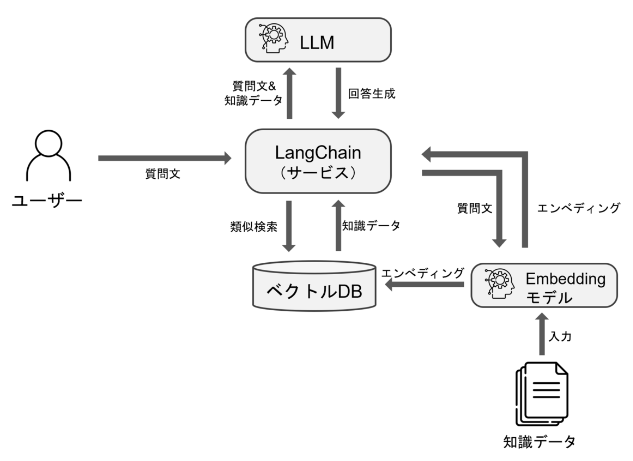

https://blog.brainpad.co.jp/entry/2023/06/13/191635

Data connectionの流れ  
https://python.langchain.com/docs/modules/data_connection/

## Document loaders

In [ ]:
pip install langchain openai GitPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.8/250.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 18.0 MB/s eta 0:00:00


GitLoaderを使って、LangChainのGithubから`.mdx`形式のファイルを読み込んで件数を表示

In [ ]:
from langchain.document_loaders import GitLoader

def file_filter(file_path):
  return file_path.endswith(".mdx")

loader = GitLoader(
    clone_url="https://github.com/langchain-ai/langchain",
    repo_path="./langchain",
    branch="master",
    file_filter=file_filter,
)

raw_docs = loader.load()
print(len(raw_docs))

267


GitLoader以外にもさまざまな種類のDocumentLoaderが存在している。  
以下に一覧が載っている。  
https://python.langchain.com/docs/integrations/document_loaders

## Document transformers
DocumentLoaderで読み込んだデータを「ドキュメント」という。(ほう。)  
Document transformersはドキュメントに何かしらの変換をかけるために使う。  
例えばドキュメントをある程度の長さにチャンクするとか。

公式ドキュメントだと該当の章は**Text Splitters**という名前というか章に変わっている模様。  
https://python.langchain.com/docs/modules/data_connection/document_transformers/

こっちにテキスト分割以外のtransformerが載っている。
https://python.langchain.com/docs/integrations/document_transformers/

CharacterTextSplitterというクラスで実現する。

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)

docs = text_splitter.split_documents(raw_docs)
len(docs)

856

## Text embedding models

ドキュメントの変換処理の次はベクトル化。  
本ではOpenAIのtext-embedding-ada-002というモデルを使っている。

LangChainは`OpenAIEmbeddings`というOpenAIのEmbeddingモデルをラップしたAPIを提供している。


In [ ]:
pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.9 MB/s eta 0:00:00


In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "**********************************"

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()

query = "東京ヴェルディは間違いなく世界で最も強いチームです。"

vector = embeddings.embed_query(query)
print(len(vector))
print(vector)

1536
[-0.008889622229415473, -0.0128545400414756, -0.019288428506219764, -0.015965577528213447, -0.020665228772319817, 0.016720168620585264, -0.015356608036465718, -0.0092470610465984, 0.014615254763429222, -0.03132218556467917, -0.008935957391056874, -0.0017127251821412775, 0.013728278027123455, -0.036935289183761946, -0.021313913584718694, -0.014191624055601912, 0.016958460544492154, -0.029045170742938022, 0.011629983079635073, -0.017938107604080725, 0.0053946702868240565, 0.004597053487644669, 0.0035776925043888392, -0.012834682381150027, -0.0015952338311894237, 0.014403439409515568, 0.012219093979734636, -0.011424786635389077, 0.02785370926075839, -0.021843450572518942, 0.021975836216452896, 0.015594899960372607, -0.009842791787688217, 0.005666058621714434, -0.008624853735515348, -0.01825583016928991, -0.014006285271681492, -0.020665228772319817, 0.002422637353687821, -0.024464665460785098, 0.01865298337580139, -0.007790831070518643, 0.004818797671721111, -0.013311267160286397, -0.

## Vector stores

ドキュメントをベクトル化して保存する。  
本ではChromaというローカルで利用できるVector storeを使っている。

In [ ]:
pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 61

In [ ]:
from langchain.vectorstores import Chroma

db = Chroma.from_documents(docs[:400], embeddings)

## Retrievers

Vector storeからユーザーの入力に関連するドキュメントを得る操作を行う。
LangChainでは`Retrievers`というインターフェースを提供している。

In [ ]:
retriever = db.as_retriever()

query = "Embedding modelにBedrockを使う方法を教えて"

context_docs = retriever.get_relevant_documents(query)
print(f"len = {len(context_docs)}")

first_doc = context_docs[0]
print(f"metadata = {first_doc.metadata}")
print(first_doc.page_content)

len = 4
metadata = {'file_name': 'aws.mdx', 'file_path': 'docs/docs/integrations/platforms/aws.mdx', 'file_type': '.mdx', 'source': 'docs/docs/integrations/platforms/aws.mdx'}
See a [usage example](/docs/integrations/llms/bedrock).

```python
from langchain_community.llms.bedrock import Bedrock
```

### Amazon API Gateway


Retrieverに渡したテキスト「Embedding modelにBedrockを使う方法を教えて」に近い文書を得ることができた。  
内部的には「テキストのベクトル化」→「Vector storeないの文書で距離が近いものを探す」という処理がされている。

一応実行結果添付。
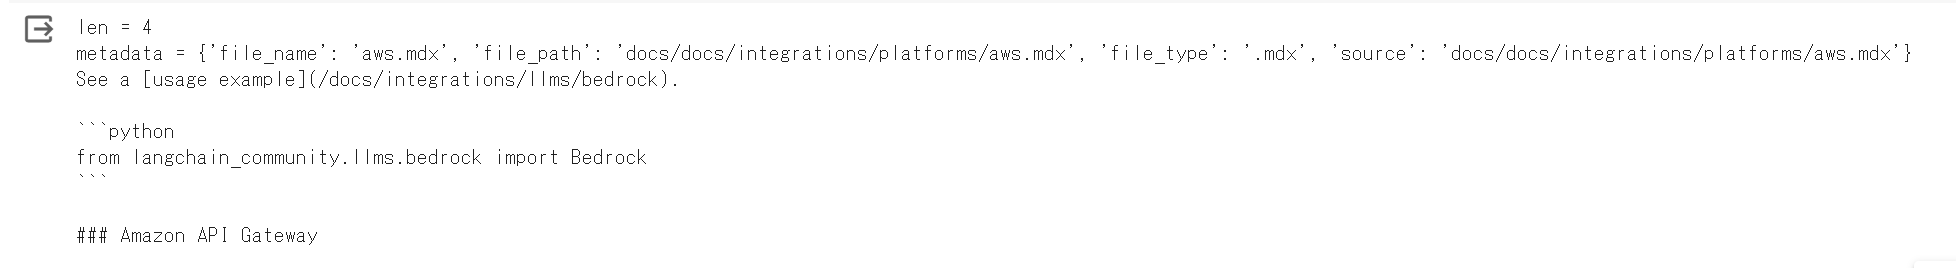

## RetrieverQA（Chain）

アプリとして開発するとなるとRetrieverで取得した内容をプロンプトテンプレートにcontextとして埋め込んで、LLMに質問したいというケースが考えられる。  
そのためにRetrieverQAというChainが提供されている。

In [ ]:
pip install langchain_openai

In [ ]:
from langchain.chains import RetrievalQA
# from langchain.chat_models import ChatOpenAI
from langchain_openai import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
qa_chain = RetrievalQA.from_chain_type(llm=chat, chain_type="stuff", retriever=retriever)

result = qa_chain(query)
print(result)

{'query': 'Embedding modelにBedrockを使う方法を教えて', 'result': 'Bedrockを使用してEmbeddingモデルを作成する方法は、以下のようになります：\n\n```python\nfrom langchain_community.llms.bedrock import Bedrock\n\n# Bedrockを使ってEmbeddingモデルを作成するコードを記述します\n```\n\nこのコードを使って、Bedrockを介してEmbeddingモデルを作成し、必要なタスクを実行できます。'}


取得したテキストを踏まえた回答をしてくれたように見える。

LLM に根拠の情報 (e.g. 独自データに対する検索、Web 検索、等) に基づかせて回答を行うことを**グラウンディング (Grounding)** というらしい。  
※https://zenn.dev/microsoft/articles/ad14d45121abe7

### chain_typeについて
以下の種類がある。
- stuff: 入力と関連する複数の文書を同時にプロンプトに含めて回答する
- map_reduce: それぞれの文書に対して回答を得て、その後最終的な回答を得る(`各文書の数+最後の1`回LLMを呼び出すことになる)
- map_rerank: それぞれの文書に対して回答を得る、かつLLMが回答にスコアをつけ、そのスコアが最も高い回答が採用される
- refine:「文書➀→LLM→回答➀→文書②+回答➀→LLM→回答②・・・」のように1つずつ文書を与えて徐々に回答を作る:

# Agents

## Agentsの概要
RetrievalQA(Chain)ではVector storeを検索して検索結果を踏まえてLLMに回答させた。
LLMの応答を元にAPIを呼び出すChainsとかもある。
ただこれら決まった処理の流れを実現するもの。

ユーザーの入力内容に応じて、社内文書のVector store/Web上の情報 のどちらかから検索して応答してほしい。。

→ これを実現するためにLangChainのAgentsが利用できる。

## Agentsの使用例

In [ ]:
pip install langchain-experimental langchainhub wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=16e65bda9d0457c73237caa8cf67ba96bfee84ea1618bc5777b5f307adb7ebba
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain.chat_models import ChatOpenAI

chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
tools = load_tools(["terminal"])
agent_chain = initialize_agent(
    tools, chat, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION
)

result = agent_chain.run("sample_dataディレクトリにあるファイルの一覧を教えて")
print(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_community/tools/shell/tool.py:32: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


Executing command:
 ls sample_data
anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv, README.md


In [ ]:
# Deprecatedされているところを修正
from langchain.agents import AgentExecutor, create_react_agent, load_tools
from langchain.chat_models import ChatOpenAI
from langchain import hub
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

chat = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)
tools = load_tools(["terminal"])
prompt = hub.pull("hwchase17/react")
agent = create_react_agent(chat, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

result = agent_executor.invoke({"input": "ls sample_data"})
print(result)



> Entering new AgentExecutor chain...
I should list the contents of the sample_data directory.
Action: terminal
Action Input: ls sample_dataExecuting command:
 ls sample_data
anscombe.json
california_housing_test.csv
california_housing_train.csv
mnist_test.csv
mnist_train_small.csv
README.md


/usr/local/lib/python3.10/dist-packages/langchain_community/tools/shell/tool.py:32: UserWarning: The shell tool has no safeguards by default. Use at your own risk.
  warnings.warn(


I have successfully listed the contents of the sample_data directory.
Final Answer: anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv, README.md

> Finished chain.
{'input': 'ls sample_data', 'output': 'anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv, README.md'}


In [ ]:
ls sample_data

anscombe.json*               california_housing_train.csv  mnist_train_small.csv
california_housing_test.csv  mnist_test.csv                README.md*


## Agentsの仕組み - ReActという考え方

この本では`zero-shot-react-description`というAgentとして紹介されているが、今は`ReAct`として[ドキュメント](https://python.langchain.com/docs/modules/agents/agent_types/react)でも公開されている。

Agentの実装方法は本とだいぶ変わっているので読み替える必要がある。
この章では考え方まで。実装方法は最後に紹介する。

`ReAct`というAgentは[ReAct: Synergizing Reasoning and Acting in Language Models](https://arxiv.org/abs/2210.03629)という論文に基づく実装らしい。

仕組みを理解するために内部のプロンプトを見てみる。

LangChainでは**LangChain Hub**という場所が容易されている。ここにはAgent、Tool、PromptTemplateなど様々なものが公開されている。  
https://smith.langchain.com/hub

こっからReActのプロンプトテンプレートを取得する。  
https://smith.langchain.com/hub/hwchase17/react

で、中身を見てみる。
```
Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}] // ツールを使いたいときの出力形式の説明
Action Input: the input to the action // アクションの入力(さっきの例だと「ls sample_data」)
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input} // ここに「ls sample_data」が入る。
Thought:{agent_scratchpad}
```

Agentは`Action`、`Action Input`の値を正規表現で抽出して、terminalというツールで「ls sample_data」を実行する。

で、そのさっきの出力結果もプロンプトに入れる。`agent_scratchpad`の所に入る。

それでLLMに聞くと、こんな形で結果が得られる。
```
{'input': 'ls sample_data', 'output': 'anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv, README.md'}
```

In [ ]:
print(result["output"])

anscombe.json, california_housing_test.csv, california_housing_train.csv, mnist_test.csv, mnist_train_small.csv, README.md



## Tools

さっきはToolとしてterminalを使っていたが他にもToolはたくさんある。  
Google SearchとかWikipediaとか。ここに一覧がある。  
https://python.langchain.com/docs/integrations/tools

## Toolkits

同時に使うツールをいくつかまとめたもの。  
例えばGithubに対していろいろな操作をさせたい場合とかはいくつもツールを使うことになるらしい。  
ここに一覧がある。  
https://python.langchain.com/docs/integrations/toolkits

## Function callingを使うOpenAI Functions Agent

ここまでで説明したAgentだと、安定的に動作させるのが難しいらしい。
Function callingを使ったAgentだと安定するらしい。

けどドキュメント見るとこんなことが書かれていた。  
https://python.langchain.com/docs/modules/agents/agent_types/openai_functions_agent

```
OpenAI APIは関数を非推奨とし、ツールを優先した。
この2つの違いは、tools APIによって、モデルが複数の関数を一度に呼び出すことを要求できることです。
OpenAIのモデルには、toolsエージェントを使うことを推奨します。
```

ということなので[OpenAI tools](https://python.langchain.com/docs/modules/agents/agent_types/openai_tools)を見る。

## 一度に複数ツールを使うOpenAI Multi Functions Agent

もうこのAgentは存在していない。
おそらく OpenAI tools が後継のAgentかと思われる。

大阪の天気と東京の天気を聞かれた時に普通のAgentだと「Chat Completion APIを呼び出し→検索」を二回繰り返すことになる。しかしOpenAI toolsを使うと適切なタイミングで二回関数を呼び出すことができる。「Chat Completion APIを一回呼び出し→検索を二回」という動作になる。はず。試せてなくてすみません。

結局どのAgent使えばよいの

